<img src="https://gitlab.inf.unibz.it/earth_observation_public/eurac-openeo-examples/-/raw/main/python/aux_data/eurac_EO.png"
     alt="EURAC EO logo"
     style="float: left; margin-right: 10px; max-width: 300px" />

<img src="https://avatars.githubusercontent.com/u/63704085?s=400&u=5dc6c45b7d457ce6f303fbc612091cb2c133482f&v=4"
     alt="SAR2Cube logo"
     style="float: right; max-width: 200px" />
# SAR2Cube and openEO - Accessing and Analyzing SAR data on-the-fly
Author michele.claus@eurac.edu

Date: 2022/09/29

Updated: 2023/05/15

## Useful links:

SAR2Cube website: https://sar2cube.projects.eurac.edu/

openEO main website: https://openeo.org/

openEO Python Client documentation: https://open-eo.github.io/openeo-python-client/index.html

Getting started guide for openEO with python: https://openeo.org/documentation/1.0/python/

## Topics
- Login to Eurac's openEO backend containing the SAR2Cube data sets
- Discover the data sets and processes
- Access and process data via openEO
- Common use cases:
    - Compute the intensity over the area of interest with different Multi Look sizes in SAR and geocoded domain
    - Compute the coherence for a given timespan and baseline

## Import all the libraries and utilities functions
The ones included in the eo_utils.py file are needed for the ipyleaflet interactive map

Please check to have the latest `openeo` library. Please check here for the latest available version: https://pypi.org/project/openeo/

In [1]:
import os
import openeo
import xarray as xr
import matplotlib.pyplot as plt
try:
    from eo_utils import *
except Exception as e:
    print(e)

## Connect and login

In [2]:
openeoHost = "https://openeo.eurac.edu"
conn = openeo.connect(openeoHost).authenticate_oidc(client_id="openEO_PKCE")

Authenticated using refresh token.


### Get the info of the account

In [3]:
conn.describe_account()

{'user_id': 'dfd05cf2-30d1-4139-9cda-493787936318',
 'name': 'MIchele Claus',
 'links': None}

## openEO back-end discovery

### Discover the available collections

In [4]:
conn.list_collections()

[{'stac_version': '1.0.0',
  'stac_extensions': ['datacube', 'scientific'],
  'type': 'Collection',
  'id': 'ADO_CORINE_100m_3035_ODC',
  'title': 'Corine Land Cover (CLC) 2018',
  'description': 'CLC2018 is one of the Corine Land Cover (CLC) datasets produced within the frame the Copernicus Land Monitoring Service referring to land cover / land use status of year 2018. CLC service has a long-time heritage (formerly known as "CORINE Land Cover Programme"), coordinated by the European Environment Agency (EEA). It provides consistent and thematically detailed information on land cover and land cover changes across Europe.',
  'keywords': ['Copernicus',
   'Land',
   'Satellite Image Interpretation',
   '2018',
   'Corine',
   'Corine Land Cover'],
  'version': 'v1',
  'deprecated': False,
  'license': 'CC-BY-4.0',
  'sci:citation': 'Copyright holder: European Environment Agency (EEA)',
  'providers': [{'name': 'Eurac EO ODC',
    'url': 'https://www.eurac.edu',
    'roles': ['host']},
   {'name': 'European Environment Agency (EEA)',
    'url': 'mailto:copernicus@eea.europa.eu',
    'roles': ['producer']}],
  'extent': {'spatial': {'bbox': [[3.097476122153772,
      42.85328336956984,
      17.506871070250423,
      50.35760818883288]]},
   'temporal': {'interval': [['2018-01-01T23:59:00Z',
      '2018-01-01T23:59:00Z']]}},
  'links': [{'rel': 'licence',
    'href': 'https://creativecommons.org/licenses/by/4.0/',
    'type': 'text/html',
    'title': 'License Link'}],
  'cube:dimensions': {'DATE': {'type': 'temporal',
    'extent': ['2018-01-01T23:59:00Z', '2018-01-01T23:59:00Z']},
   'X': {'type': 'spatial',
    'axis': 'x',
    'extent': [3.097476122153772, 17.506871070250423],
    'reference_system': 3035},
   'Y': {'type': 'spatial',
    'axis': 'y',
    'extent': [42.85328336956984, 50.35760818883288],
    'reference_system': 3035},
   'bands': {'type': 'bands', 'values': ['CLC2018_WM']}},
  'summaries': {'rows': 8332, 'columns': 10240, 'gsd': [100.0]}},
 {'stac_version': '1.0.0',
  'stac_extensions': ['datacube'],
  'type': 'Collection',
  'id': 'ADO_LST_MODIS_231m_3035_ODC',
  'title': 'Land Surface Temperature - 231m 8 day mean',
  'description': 'The Land Surface Temperature (LST) is based on MODIS satellite data. The LST is based on 8 day MOD11A2 (v006) LST products. The spatial resolution is 231 m after regridding from the original 1000 m resolution. The LST is masked to the highest quality standards using the provided quality layers. Missing pixel values in the time series are linearly interpolated. Non-vegetatated areas are masked using the MODIS land cover product layer MCD12Q1 FAO-Land Cover Classification System 1 (LCCS1). The final product is regridded to the LAEA Projection (EPSG:3035). The Land Surface Temperature is expressed in degree Celsius.',
  'deprecated': False,
  'license': 'CC-BY-4.0',
  'providers': [{'name': 'Eurac EO ODC',
    'url': 'http://www.eurac.edu/',
    'roles': ['producer', 'host']}],
  'extent': {'spatial': {'bbox': [[3.080800333295437,
      42.841014591998366,
      17.523924303829347,
      50.36459883616284]]},
   'temporal': {'interval': [['2001-01-01T00:00:00Z',
      '2023-02-02T00:00:00Z']]}},
  'links': [{'rel': 'license',
    'href': 'https://creativecommons.org/licenses/by/4.0/',
    'type': 'text/html',
    'title': 'License link'}],
  'cube:dimensions': {'DATE': {'type': 'temporal',
    'extent': ['2001-01-01T00:00:00Z', '2023-02-02T00:00:00Z']},
   'X': {'type': 'spatial',
    'axis': 'x',
    'extent': [3.080800333295437, 17.523924303829347]},
   'Y': {'type': 'spatial',
    'axis': 'y',
    'extent': [42.841014591998366, 50.36459883616284]},
   'bands': {'type': 'bands', 'values': ['8d_lst_celsius_linint']}}},
 {'stac_version': '1.0.0',
  'stac_extensions': ['datacube'],
  'type': 'Collection',
  'id': 'ADO_NDVI_MODIS_231m_3035_ODC',
  'title': 'Normalized Difference Vegetation Index - 231m 8 day Maximum Value Composite',
  'description': 'The Normalized Difference Vegeta

### Discover the available processes

In [5]:
conn.list_processes()

[{'engine': '[ODC_DASK]',
  'id': 'dimension_labels',
  'summary': 'Get the dimension labels',
  'description': 'Returns all labels for a dimension in the data cube. The labels have the same order as in the data cube.',
  'parameters': [{'schema': {'subtype': 'raster-cube', 'type': 'object'},
    'name': 'data',
    'description': 'The data cube.'},
   {'schema': {'type': 'string'},
    'name': 'dimension',
    'description': 'The name of the dimension to get the labels for.'}],
  'categories': ['cubes'],
  'returns': {'schema': {'type': 'array',
    'items': {'anyOf': [{'type': 'number'}, {'type': 'string'}]}},
   'description': 'The labels as array.'},
  'exceptions': {}},
 {'engine': '[WCPS, ODC_DASK]',
  'id': 'ln',
  'summary': 'Natural logarithm',
  'description': 'The natural logarithm is the logarithm to the base *e* of the number `x`, which equals to using the *log* process with the base set to *e*. The natural logarithm is the inverse function of taking *e* to the power x.\n\nThe no-data value `null` is passed through.\n\nThe computations follow [IEEE Standard 754](https://ieeexplore.ieee.org/document/8766229) whenever the processing environment supports it. Therefore, `ln(0)` results in ±infinity if the processing environment supports it or otherwise an error is thrown.',
  'parameters': [{'schema': {'type': ['number', 'null']},
    'name': 'x',
    'description': 'A number to compute the natural logarithm for.'}],
  'categories': ['math > exponential & logarithmic'],
  'links': [{'rel': 'about',
    'href': 'http://mathworld.wolfram.com/NaturalLogarithm.html',
    'title': 'Natural logarithm explained by Wolfram MathWorld'},
   {'rel': 'about',
    'href': 'https://ieeexplore.ieee.org/document/8766229',
    'title': 'IEEE Standard 754-2019 for Floating-Point Arithmetic'}],
  'returns': {'schema': {'type': ['number', 'null']},
   'description': 'The computed natural logarithm.'},
  'exceptions': {},
  'examples': [{'arguments': {'x': 1}, 'returns': 0}]},
 {'engine': '[ODC_DASK]',
  'id': 'coherence',
  'summary': 'Compute the complex coherence with SAR data',
  'description': 'Compute the complex coherence with SAR data, given the specified time delta.',
  'parameters': [{'schema': {'subtype': 'raster-cube', 'type': 'object'},
    'name': 'data',
    'description': 'A raster data cube with exactly two horizontal spatial dimensions and an arbitrary number of additional dimensions. The process is applied to all additional dimensions individually.'},
   {'schema': {'type': 'integer',
     'enum': [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96]},
    'default': '6',
    'name': 'timedelta',
    'description': 'Temporal delta in days between acquisitions on which we want to compute coherence.',
    'optional': True}],
  'categories': ['cubes', 'math'],
  'returns': {'schema': {'subtype': 'raster-cube', 'type': 'object'},
   'description': 'A data cube with the projected values in the requested projection.'},
  'exceptions': {}},
 {'engine': '[WCPS]',
  'id': 'cos',
  'summary': 'Cosine',
  'description': 'Computes the cosine of `x`.\n\nWorks on radians only.\nThe no-data value `null` is passed through and therefore gets propagated.',
  'parameters': [{'schema': {'type': ['number', 'null']},
    'name': 'x',
    'description': 'An angle in radians.'}],
  'categories': ['math > trigonometric'],
  'links': [{'rel': 'about',
    'href': 'http://mathworld.wolfram.com/Cosine.html',
    'title': 'Cosine explained by Wolfram MathWorld'}],
  'returns': {'schema': {'type': ['number', 'null']},
   'description': 'The computed cosine of `x`.'},
  'exceptions': {},
  'examples': [{'arguments': {'x': 0}, 'returns': 1}]},
 {'engine': '[WCPS, ODC_DASK]',
  'id': 'lt',
  'summary': 'Less than comparison',
  'description': 'Compares whether `x` is strictly less than `y`.\n\n**Remarks:**\n\n* If any operand is `null`, the return value is `null`.\n* If any operand is an array or object, the return value is `false`.\n* If any

# SAR processing

We load an openEO collection containing pre-processed Sentinel-1 SLC data. It contains real and imaginary parts of each polarization, the longitude and latitude grids used for geocoding, LIA and DEM used for radar masking.

In [6]:
conn.describe_collection("SAR2Cube_SInCohMap_S1_L0_117_ASC_SOUTH_TYROL")

{'stac_version': '0.9.0',
 'stac_extensions': ['datacube'],
 'type': 'Collection',
 'id': 'SAR2Cube_SInCohMap_S1_L0_117_ASC_SOUTH_TYROL',
 'title': 'SAR2Cube_SInCohMap_S1_L0_117_ASC_SOUTH_TYROL',
 'description': 'Sentinel-1 SLC Data. SAR2Cube Level-0 preprocessing.',
 'deprecated': False,
 'license': 'CC-BY-4.0',
 'providers': [{'name': 'Eurac EO ODC',
   'url': 'http://www.eurac.edu/',
   'roles': ['producer', 'host']}],
 'extent': {'spatial': {'bbox': [[9.528703689575195,
     45.31370162963867,
     13.141668319702148,
     47.318817138671875]]},
  'temporal': {'interval': [['2016-09-08T05:27:59Z',
     '2022-08-20T05:27:59Z']]}},
 'links': [{'rel': 'license',
   'href': 'https://creativecommons.org/licenses/by/4.0/',
   'type': 'text/html',
   'title': 'License link'}],
 'cube:dimensions': {'DATE': {'type': 'temporal',
   'extent': ['2016-09-08T05:27:59+00:00', '2022-08-20T05:27:59+00:00']},
  'X': {'type': 'spatial',
   'axis': 'x',
   'extent': [9.528703689575195, 13.141668319702148],
   'reference_system': 32632},
  'Y': {'type': 'spatial',
   'axis': 'y',
   'extent': [45.31370162963867, 47.318817138671875],
   'reference_system': 32632},
  'bands': {'type': 'bands',
   'values': ['DEM',
    'LIA',
    'i_VH',
    'i_VV',
    'q_VH',
    'q_VV',
    'grid_lat',
    'grid_lon',
    'i_ifg_VH',
    'i_ifg_VV',
    'q_ifg_VH',
    'q_ifg_VV',
    'i_ifg_VH_nocorrect',
    'i_ifg_VV_nocorrect',
    'q_ifg_VH_nocorrect',
    'q_ifg_VV_nocorrect']}}}

## Select the AOI
Use the rectangle selection tool to select the area of interest.

If it does not work, it means that some library is missing and the functions contained in `eo_utils.py` could not be loaded.

Uncomment the line defining `spatial_extent` to use a predefined area instead.

In [7]:
center = [46.5, 11.4]
zoom = 12

eoMap = openeoMap(center,zoom)
eoMap.map

Map(center=[46.5, 11.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [8]:
bbox = eoMap.getBbox()
print("Coordinates selected from map:","\n west",bbox[0],"\n east",bbox[2],"\n south",bbox[1],"\n north",bbox[3])

Coordinates selected from map: 
 west 11.265106 
 east 11.402435 
 south 46.452646 
 north 46.518835


## Load the datacube

In [9]:
conn = openeo.connect(openeoHost).authenticate_oidc(client_id="openEO_PKCE")

collection      = "SAR2Cube_SInCohMap_S1_L0_117_ASC_SOUTH_TYROL"
temporal_extent = ["2022-06-01T00:00:00.000Z", "2022-06-30T00:00:00.000Z"]
spatial_extent  = {"west":bbox[0],"east":bbox[2],"south":bbox[1],"north":bbox[3]}
# spatial_extent = {"west": 11.259613, "east": 11.406212, "south": 46.461019, "north": 46.522237}

S1_slant_range = conn.load_collection(collection,spatial_extent=spatial_extent,temporal_extent=temporal_extent)

Authenticated using refresh token.


## Compute the VH intensity
We compute the intensity from the complex data

In [10]:
i_VH = S1_slant_range.band("i_VH")
q_VH = S1_slant_range.band("q_VH")
S1_INT = i_VH**2+q_VH**2
S1_INT_VH = S1_INT.add_dimension(name="bands",label="VH")

## Compute the Multi-Look
The size of the multi-look window can be changed depending on the requirements. Have a look at the following image explaining Multi-Look.

[source: ESA](https://step.esa.int/docs/tutorials/S1TBX%20SAR%20Basics%20Tutorial.pdf)
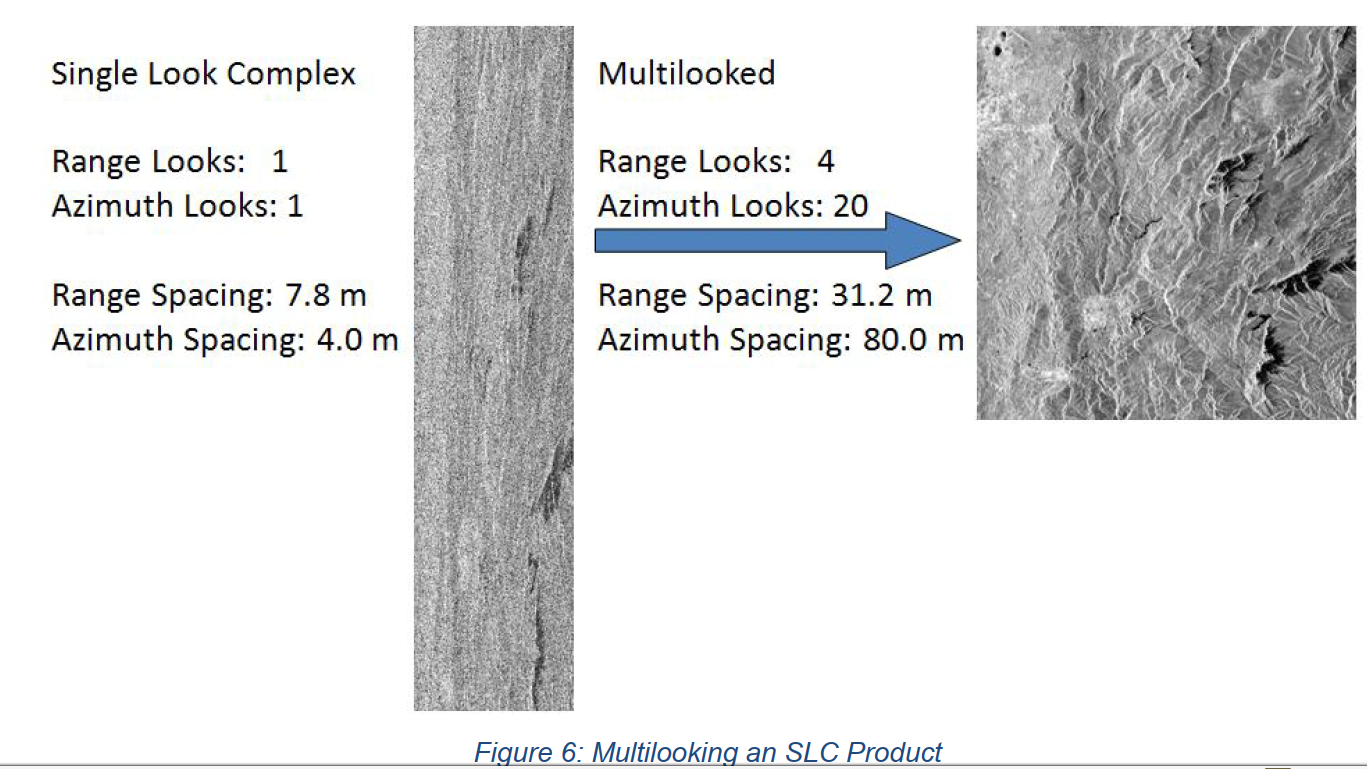

In [11]:
range_looks   = 4
azimuth_looks = 19

S1_INT_ML = S1_INT_VH.aggregate_spatial_window(
    boundary="trim",
    size=[azimuth_looks,range_looks],
    reducer="mean")

## Temporal average
We reduce the temporal dimension to get a 2d image for visualization purposes. This can also be considered as a multi-look along time.

In [13]:
S1_INT_ML_VH_MEAN = S1_INT_ML.reduce_dimension(reducer="mean", dimension='DATE')

Rescale the result for storing it into a PNG image

In [14]:
S1_INT_ML_VH_MEAN_0_255 = S1_INT_ML_VH_MEAN.linear_scale_range(input_min=0, input_max=0.1, output_min=0, output_max=255)

## Download the result

In [15]:
%%time
S1_INT_PNG = S1_INT_ML_VH_MEAN_0_255.save_result(format="PNG")
S1_INT_PNG.download("./S1_INT_VH_19X4_ASC_ST.png")

CPU times: user 18.3 ms, sys: 1.45 ms, total: 19.7 ms
Wall time: 1min 21s


Do the same without multi-look to show a comparison

In [18]:
%%time
S1_INT_VH_MEAN = S1_INT_VH.reduce_dimension(reducer="mean", dimension="DATE")
S1_INT_VH_MEAN_0_255 = S1_INT_VH_MEAN.linear_scale_range(input_min=0, input_max=0.1, output_min=0, output_max=255)
S1_INT_PNG_2 = S1_INT_VH_MEAN_0_255.save_result(format="PNG")
S1_INT_PNG_2.download("./S1_INT_VH_ASC_ST_SINGLE_LOOK.png")

CPU times: user 14.8 ms, sys: 8.63 ms, total: 23.5 ms
Wall time: 1min 13s


## Comparison of original SLC data vs multi-looked version
Average intensity in June 2022

[]

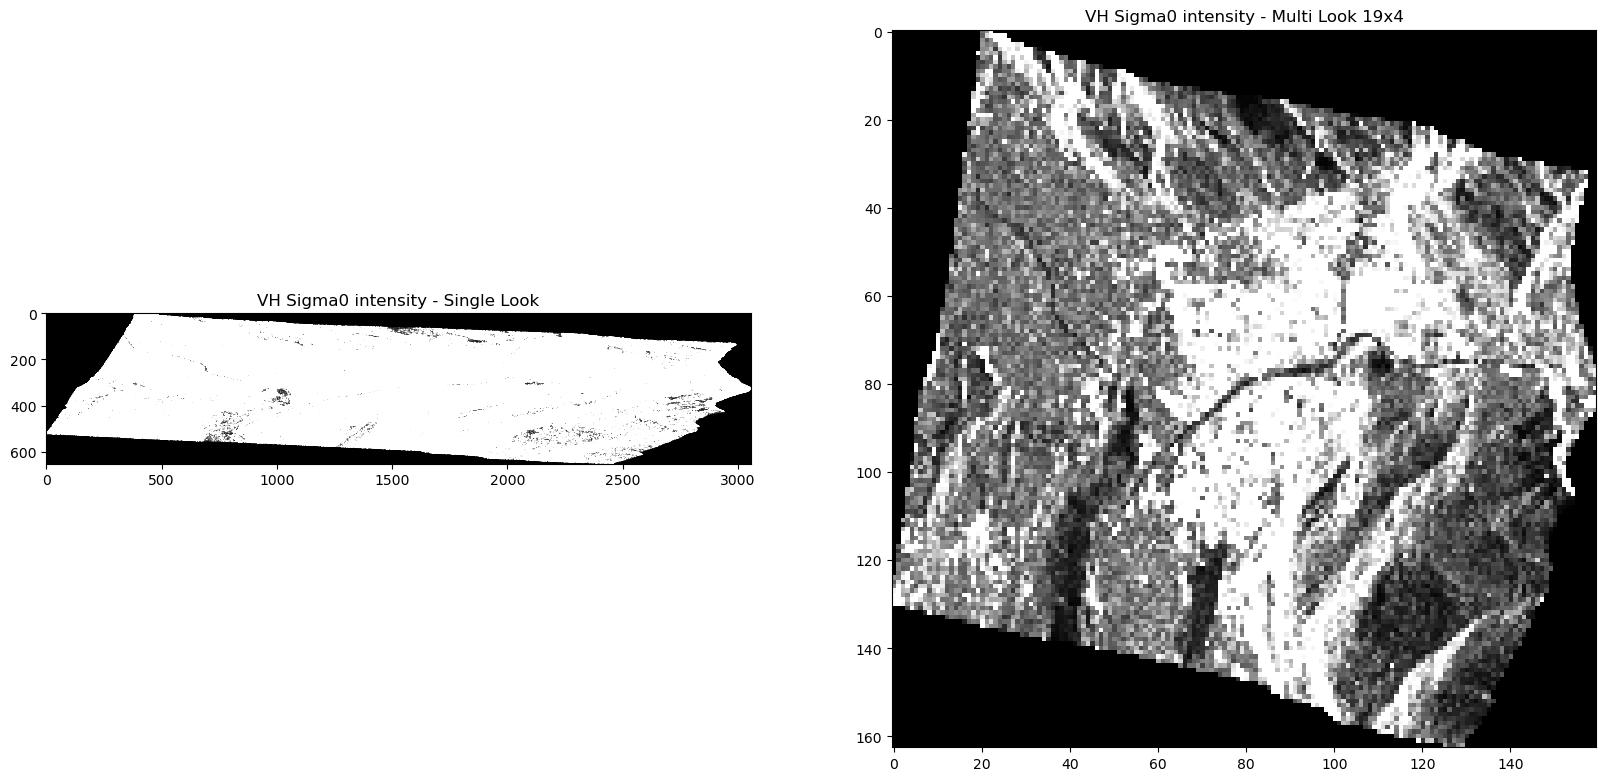

In [19]:
plot_args = {"cmap":"Greys_r","vmin":0,"vmax":0.1}
fig, ax = plt.subplots(1,2,figsize=(20,10))
im = plt.imread("./S1_INT_VH_ASC_ST_SINGLE_LOOK.png")
ax[0].set_title("VH Sigma0 intensity - Single Look")
ax[0].imshow(im,**plot_args)
plot_args = {"cmap":"Greys_r","vmin":0,"vmax":1}
im = plt.imread("./S1_INT_VH_19X4_ASC_ST.png")
ax[1].set_title("VH Sigma0 intensity - Multi Look 19x4")
ax[1].imshow(im,**plot_args)
plt.plot()

# From slant-range to geographic (UTM) coordinates: geocoding

Load the datacube in the same way as before.

In [20]:
conn = openeo.connect(openeoHost).authenticate_oidc(client_id="openEO_PKCE")

collection      = "SAR2Cube_SInCohMap_S1_L0_117_ASC_SOUTH_TYROL"
temporal_extent = ["2022-06-01T00:00:00.000Z", "2022-06-30T00:00:00.000Z"]
spatial_extent  = {"west":bbox[0],"east":bbox[2],"south":bbox[1],"north":bbox[3]}
# spatial_extent = {"west": 11.259613, "east": 11.406212, "south": 46.461019, "north": 46.522237}

S1_slant_range = conn.load_collection(collection,spatial_extent=spatial_extent,temporal_extent=temporal_extent)

Authenticated using refresh token.


Compute the intensity, this time we use the VV polarization.

In [21]:
i_VV = S1_slant_range.band("i_VV")
q_VV = S1_slant_range.band("q_VV")
S1_INT = i_VV**2+q_VV**2
S1_INT_VV = S1_INT.add_dimension(name="bands",label="VV")

Compute the Multi Look over the intensity.

In [22]:
range_looks   = 4
azimuth_looks = 19

S1_INT_VV_ML = S1_INT_VV.aggregate_spatial_window(
    boundary="trim",
    size=[azimuth_looks,range_looks],
    reducer="mean")

Linear to dB conversion:

In [24]:
from openeo.processes import log
S1_INT_VV_ML = S1_INT_VV_ML.apply(lambda x: 10*log(x,base=10))

Compute the same Multi Look over the coordinate grids for geocoding

In [25]:
lat_lon_grids = S1_slant_range.filter_bands(["grid_lon","grid_lat"])

lat_lon_grids_ML = lat_lon_grids.aggregate_spatial_window(
    boundary="trim",
    size=[azimuth_looks,range_looks],
    reducer="mean")

Merge the intensity and the coordinate grids into the same datacube

In [26]:
S1_INT_VV_ML = S1_INT_VV_ML.merge_cubes(lat_lon_grids_ML)

Compute the average over time

In [28]:
S1_INT_ML_VV_MEAN = S1_INT_VV_ML.reduce_dimension(reducer="mean", dimension="DATE")

Apply geocoding. We choose 20m resolution for the pixel size and the local UTM zone as projection.

We can choose only from 10, 20 or 60m for resolution, for being able to align the data with Sentinel-2 grid.

This process is not yet an official openEO process and therefore the syntax to apply it is not streamlined as with the other processes.

In [29]:
args_geocoding = {"resolution":20,"crs":32632}
S1_INT_ML_VV_GEOCODED = S1_INT_ML_VV_MEAN.process("geocode",args_geocoding, data=S1_INT_ML_VV_MEAN)

Download the result as a geoTiff to check the geocoding

In [30]:
%%time
S1_INT_ML_VV_GEOCODED.download("./S1_INT_VV_4x19_GEOCODED_ASC_DB_ST_20m.tiff",format="GTiff")

CPU times: user 21.3 ms, sys: 5.56 ms, total: 26.8 ms
Wall time: 1min 23s


Loading the geoTiff using rioxarray

In [36]:
vv_asc_geocoded = rioxarray.open_rasterio("./S1_INT_VV_4x19_GEOCODED_ASC_DB_ST_20m.tiff")
vv_asc_geocoded

<xarray.DataArray (band: 1, y: 383, x: 538)>
[206054 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.738e+05 6.738e+05 ... 6.845e+05 6.845e+05
  * y            (y) float64 5.154e+06 5.154e+06 ... 5.147e+06 5.147e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        29.909042358398
    STATISTICS_MEAN:           -11.769192286626
    STATISTICS_MINIMUM:        -41.321426391602
    STATISTICS_STDDEV:         4.6143046036535
    STATISTICS_VALID_PERCENT:  94.05
    _FillValue:                nan
    scale_factor:              1.0
    add_offset:                0.0
    long_name:                 VV

Visualize the result with matplotlib

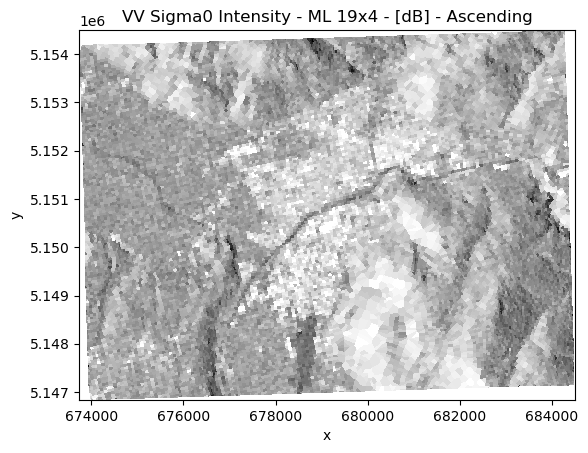

In [38]:
plot_args = {"cmap":"Greys_r","add_colorbar":False,"vmin":-30,"vmax":0}
fig, ax = plt.subplots(1,1)
vv_asc_geocoded[0].plot.imshow(ax=ax,**plot_args)
ax.set_title("VV Sigma0 Intensity - ML 19x4 - [dB] - Ascending")
plt.show()

Visualize the result interactively on the map. Note: this might not work depending on your Python environment.

If it does not work, it means that some library is missing and the functions contained in `eo_utils.py` could not be loaded.

In [35]:
center = [46.5, 11.4]
zoom = 13

eoMap = openeoMap(center,zoom)
addLayer(eoMap,"./S1_INT_VV_4x19_GEOCODED_ASC_DB_ST_20m.tiff","VV_ASC_20m",clip=[-30,0])
eoMap.map

Url()

Map(center=[46.5, 11.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…